# Recap: TensorFlow

In [1]:
# Import libearies
import tensorflow as tf # !pip install tensorflow
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [2]:
# Zero dimensional tensor
zero_dim_array = 20
zero_dim_tensor = tf.constant(zero_dim_array)
print("0-dimensional array:", zero_dim_tensor)

# One dimensional tensor
one_dim_array = np.array([12, 20, 53, 26, 11, 56], dtype = 'int32')
one_dim_tensor = tf.constant(one_dim_array)
print("1-dimensional array:", one_dim_tensor)

# Two dimensional tensor
two_dim_array = np.array([[3, 6, 7, 5], 
                          [9, 2, 3, 4],
                          [7, 1, 10,6],
                          [0, 8, 11,2]], dtype = 'int32')
two_dim_tensor = tf.constant(two_dim_array)
print("2-dimensional array:", two_dim_tensor)

0-dimensional array: tf.Tensor(20, shape=(), dtype=int32)
1-dimensional array: tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
2-dimensional array: tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


# Convolutional Neural Network (CNN or ConvNet) 
- modified from https://www.datacamp.com/tutorial/cnn-tensorflow-python

Components
- Convolutional layers
- Rectified Linear Unit (ReLU for short)
- Pooling layers
- Fully connected layers

## Import libraries

In [45]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import tensorflow as tf # !pip install tensorflow
print("TensorFlow version:", tf.__version__)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

TensorFlow version: 2.17.0


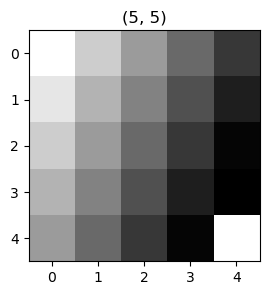

In [4]:
# Grayscale Images (2D Array)
# 0 is black, 255 is white, Values in between represent shades of gray.

grayscale_image = np.array([[0, 50, 100, 150, 200],
                            [25, 75, 125, 175, 225],
                            [50, 100, 150, 200, 250],
                            [75, 125, 175, 225, 255],
                            [100, 150, 200, 250, 0]])

plt.figure(figsize = (3, 3))
plt.imshow(grayscale_image, cmap = plt.cm.binary)
plt.title(grayscale_image.shape);

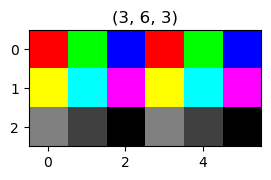

In [5]:
# RGB Images (3D Array)
rgb_image = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255]],  # Red, Green, Blue
                      [[255, 255, 0], [0, 255, 255], [255, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]],  # Yellow, Cyan, Magenta
                      [[128, 128, 128], [64, 64, 64], [0, 0, 0], [128, 128, 128], [64, 64, 64], [0, 0, 0]]  # Gray, Dark gray, Black
                      ])
# each pixel contain 3-length array that identify R-G-B value
plt.figure(figsize = (3, 3))
plt.imshow(rgb_image)
plt.title(rgb_image.shape);

## Load dataset
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# assert train_images.shape == (50000, 32, 32, 3)
# assert train_labels.shape == (10000, 32, 32, 3)
# assert y_train.shape == (50000, 1)
# assert y_test.shape == (10000, 1)

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

class_names[9]

'truck'

In [15]:
print("Total train images:\t", len(train_images))
print("Total test images:\t", len(test_images))

index = 1
print("\nImage index:", index)
print("Size: {} x {} pixels".format(train_images[index].shape[0], train_images[index].shape[1])) # 32 x 32 pixels (RGB pics)
try:
    print("Color: RGB ({}-length array)".format(train_images[index].shape[2]))
except:
    print("Colot: Grayscale")
print("Image Label: {} ({})".format(train_labels[index][0], class_names[train_labels[index][0]]))
print("Iamge matrix:\n", train_images[index])

Total train images:	 50000
Total test images:	 10000

Image index: 1
Size: 32 x 32 pixels
Color: RGB (3-length array)
Image Label: 9 (truck)
Iamge matrix:
 [[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


## Exploratory Data Analysis

In [16]:
def show_images(train_images, class_names, train_labels,
            	n_samples = 12, n_rows = 4):
    
	plt.figure(figsize = (12, 12))
	n_cols = int(n_samples/n_rows)

	for index in range(n_samples):

		train_image = train_images[index]
		label_num = train_labels[index][0]
		class_name = class_names[label_num]

		plt.subplot(n_cols, n_rows, index + 1)
		plt.xticks([])
		plt.yticks([])
		plt.grid(False)
		plt.imshow(train_image)
		plt.xlabel(class_name)

	plt.show()

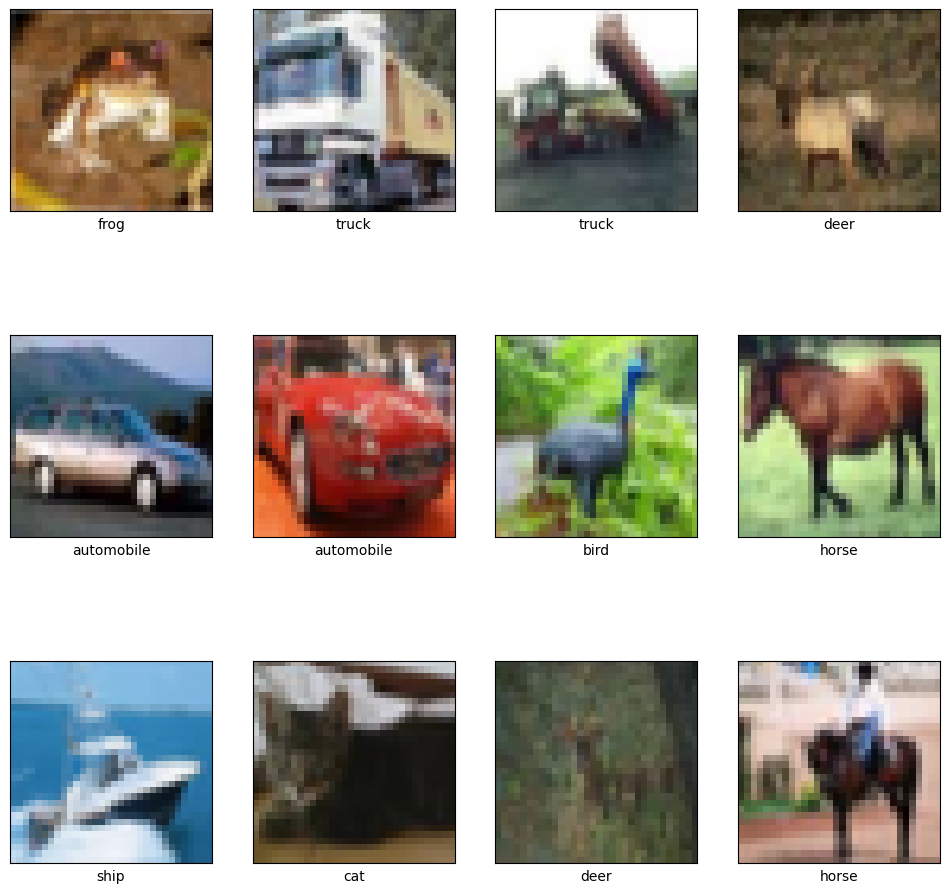

In [17]:
show_images(train_images, class_names, train_labels)

## Data preprocessing

In [18]:
max_pixel_value = 255 # normalize 0-255 to 0-1

In [19]:
index = 1
print(train_images[index][0])

train_images = train_images / max_pixel_value
print(train_images[index])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]
[[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.3882352

In [21]:
test_images = test_images / max_pixel_value
print(test_images[index])

[[[0.92156863 0.92156863 0.92156863]
  [0.90588235 0.90588235 0.90588235]
  [0.90980392 0.90980392 0.90980392]
  ...
  [0.91372549 0.91372549 0.91372549]
  [0.91372549 0.91372549 0.91372549]
  [0.90980392 0.90980392 0.90980392]]

 [[0.93333333 0.93333333 0.93333333]
  [0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863]
  ...
  [0.9254902  0.9254902  0.9254902 ]
  [0.9254902  0.9254902  0.9254902 ]
  [0.92156863 0.92156863 0.92156863]]

 [[0.92941176 0.92941176 0.92941176]
  [0.91764706 0.91764706 0.91764706]
  [0.91764706 0.91764706 0.91764706]
  ...
  [0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863]
  [0.91764706 0.91764706 0.91764706]]

 ...

 [[0.34117647 0.38823529 0.34901961]
  [0.16862745 0.2        0.14509804]
  [0.0745098  0.09019608 0.04313725]
  ...
  [0.6627451  0.72156863 0.70196078]
  [0.71372549 0.77254902 0.75686275]
  [0.7372549  0.79215686 0.78823529]]

 [[0.32156863 0.37647059 0.32156863]
  [0.18039216 0.22352941 0.14117647]


In [28]:
print("Total class names:\t", len(class_names))
print("Min label number:\t", min(train_labels, key = lambda x: x[0])[0])
print("Max label number:\t", max(train_labels, key = lambda x: x[0])[0])

Total class names:	 10
Min label number:	 0
Max label number:	 9


In [34]:
# prepare get-dummy array
print(train_labels[index])

train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

print(train_labels[index])

[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model architecture implementation

In [38]:
# Variables
INPUT_SHAPE = (32, 32, 3) # train_images[index].shape

FILTER_SHAPE = (3, 3) # result: 30x30 pixels (x 32 feature map) for each time applying filter (element-wise multiplication + sum)

# This represents the number of filters that will be applied. So, 32 different 3x3 filters will be used in the first convolutional layer. 
# Each filter will produce a separate feature map.
FILTER1_SIZE = 32
FILTER2_SIZE = 64

# Select max value from every 2x2 matrix (no overlap)
POOL_SHAPE = (2, 2) # result from 30 x 30 -> 15 x 15

FULLY_CONNECT_NUM = 128 # every value full connect for each node (from total 128 nodes)
NUM_CLASSES = len(class_names) # final nodes is total predicted classes

BATCH_SIZE = 32
EPOCHS = 30

In [54]:
# Define your input shape
model = Sequential()

# Use an Input layer to specify the input shape
model.add(Input(shape = INPUT_SHAPE))

# Add other layers
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation = 'relu')) # relu: min(value) = 0
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation = 'relu'))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation = 'relu'))
model.add(Dense(NUM_CLASSES, activation = 'softmax'))

In [55]:
model.summary()
# Total Parameters = (Filter Height × Filter Width × Input Channels + 1) × Number of Filters

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [50]:
METRICS = ['accuracy',
           Precision(name = 'precision'),
           Recall(name = 'recall')]

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

In [53]:
# Train the model
training_history = model.fit(train_images, train_labels,
                             epochs = EPOCHS, 
                             batch_size = BATCH_SIZE,
                             validation_data = (test_images, test_labels))

training_history

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.4387 - loss: 1.5738 - precision: 0.6701 - recall: 0.1935 - val_accuracy: 0.5853 - val_loss: 1.1834 - val_precision: 0.7334 - val_recall: 0.4218
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6115 - loss: 1.1050 - precision: 0.7611 - recall: 0.4535 - val_accuracy: 0.6049 - val_loss: 1.1094 - val_precision: 0.7284 - val_recall: 0.4880
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6758 - loss: 0.9276 - precision: 0.7933 - recall: 0.5485 - val_accuracy: 0.6218 - val_loss: 1.0725 - val_precision: 0.7529 - val_recall: 0.4917
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7142 - loss: 0.8178 - precision: 0.8163 - recall: 0.6084 - val_accuracy: 0.6356 - val_loss: 1.0379 - val_precision: 0.7377 - val_recall: 0.5403
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7525 - loss: 0.7063 - precision: 0.8418 - recall: 0.6688 - val_accuracy: 0

## Model evaluation

In [57]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_' + str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf, 
										   validation_perf, atol = 1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, label = metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x = intersection_idx, color = 'r', linestyle = '--', label = 'Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy = (intersection_idx, intersection_value),
         	xycoords = 'data',
         	fontsize = 10,
         	color = 'green')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc = 'lower right')

In [58]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
show_performance_curve(training_history, 'precision', 'precision')

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
test_predictions = model.predict(test_images)
print(test_predictions)

test_predicted_labels = np.argmax(test_predictions, axis = 1)
print(test_predicted_labels)

test_true_labels = np.argmax(test_labels, axis = 1)
print(test_true_labels)

In [ ]:
cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm)

cmd.plot(include_values = True, 
         cmap = 'viridis', 
         ax = None, 
         xticks_rotation = 'horizontal')
plt.show()